# Семинар 12

## Аналитические результаты
- Необходимое условие первого порядка: если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда $$
f'(x^*) = 0
$$
- Необходимое условие второго порядка: если $x^*$ точка локального минимума дважды дифференцируемой функции $f(x)$, тогда 
$$
f'(x^*) = 0 \quad \text{и} \quad f''(x^*) \succeq 0
$$
- Достаточное условие: пусть $f(x)$ дважды дифференцируемая функция, и пусть точка $x^*$ удовлетворяет условиям
$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$
тогда $x^*$ является точкой строго локального минимума функции $f(x)$.

**Замечание**: убедитесь, что Вы понимаете, как доказывать эти результаты!

### Скорости сходимости 
1. Сублинейная
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$
2. Линейная (геометрическая прогрессия)
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

3. Сверхлинейная 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^2}, 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$
4. Квадратичная
$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

## Одномерная минимизация
**Определение**. Функция $f(x)$ называется унимодальной на $[a, b]$, если существует такая точка $x^* \in [a, b]$, что 
- $f(x_1) > f(x_2)$ для любых $a \leq x_1 < x_2 < x^*$, 

и 
- $f(x_1) < f(x_2)$ для любых $x^* < x_1 < x_2 \leq b$.


### Метод дихотомии

Идея из информатики первого семестра: делим отрезок $[a,b]$ на две равные части пока не найдём минимум унимодальной функции.

Пусть $N$ - число вычислений функции $f$, тогда можно выполнить $K = \frac{N - 1}{2}$ итераций и выполнена следующая оценка
$$
|x_{K+1} - x^*| \leq \frac{b_{K+1} - a_{K+1}}{2} = \left( \frac{1}{2} \right)^{\frac{N-1}{2}} (b - a) \approx 0.5^{K} (b - a) 
$$

### Метод золотого сечения
Идея: делить отрезок $[a,b]$ не на две равные насти, а в пропорции "золотого сечения".

Оценим скорость сходимости аналогично методу дихотомии:
$$
|x_{K+1} - x^*| \leq b_{K+1} - a_{K+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^K(b-a),
$$
где $\tau = \frac{\sqrt{5} + 1}{2}$.

- Константа геометрической прогрессии **больше**, чем у метода дихотомии
- Количество вызовов функции **меньше**, чем у метода дихотомии

# Семинар 13

# Методы спуска (Descent methods). Градиентный спуск: дёшево и сердито

## Что такое методы спуска?

Последовательность $x_k$ генерируется по правилу
$$
x_{k+1} = x_k + \alpha_k h_k
$$
так что
$$
f(x_{k+1}) < f(x_k)
$$
Направление $h_k$ называется *направлением убывания*.

## Направление убывания
Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ вдоль некоторого направления убывания $h, \|h\|_2 = 1$:
$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$
Из условия убывания
$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$
и переходя к пределу при $\alpha \rightarrow 0$:
$$
\langle f'(x), h \rangle \leq 0
$$
Также из неравенства Коши-Буняковского-Шварца
$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Таким образом, направление антиградиента 
$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$
даёт направление **наискорейшего локального** убывания функции$~f$.

## Как выбрать шаг $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

Список подходов:
- Постоянный шаг 
$$
\alpha_k = \overline{\alpha}
$$
- Априорно заданная последовательность, например
$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$
- Наискорейший спуск
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$
- Требование **достаточного** убывания, требование **существенного** убывания и условие кривизны: для некоторых $\beta_1, \beta_2$, таких что $0 < \beta_1 < \beta_2 < 1$ найти $x_{k+1}$ такую что

    - Достаточное убывание: $f(x_{k+1}) \leq f(x_k) - \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $ f(x_k) - f(x_{k+1}) \geq \beta_1 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Существенное убывание: $f(x_{k+1}) \geq f(x_k) - \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $
    f(x_k) - f(x_{k+1}) \leq \beta_2 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Условие кривизны: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Обычно коэффициенты выбирают так: $\beta_1 \in (0, 0.3)$, а $\beta_2 \in (0.9, 1)$

### Анализ и мотивация подходов к выбору шага $\alpha_k$
- Постоянный шаг: самое простое и неэффективное решение
- Априорно заданная последовательность: немногим лучше постоянного шага
- Наискорейший спуск: самое лучшее решение, но применимо только если вспомогательная задача решается аналитически или ооооооочень быстро. <br></br>
То есть почти всегда неприменимо :)
- Требование достаточного убывания, требование существенного убывания и условие кривизны:
    - требование достаточного убывания гарантирует, что функция в точке $x_{k+1}$ не превосходит линейной аппроксимации с коэффициентом наклона $\beta_1$
    - требование существенного убывания гарантирует, что функция в точке $x_{k+1}$ убывает не меньше, чем линейная аппроксимация c коэффициентом наклона $\beta_2$
    - условие кривизны гарантирует, что угол наклона касательной в точке $x_{k+1}$ не меньше, чем угол наклона касательной в точке $x_k$, <br></br>
умноженный на $\beta_2$ 

Требование существенного убывания и условие кривизны обеспечивают убывание функции по выбранному направлению $h_k$. Обычно выбирают одно из них.
[comment]: <> (<img src="Goldstein.png", style="width: 600px;">)

**Теорема 1.** 
Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

**Теорема 5.**
Пусть

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ является сильно выпуклой с константой $l$
- $\alpha = \dfrac{2}{l + L}$

Тогда для градиентного метода выполнено:
$$
\| x_k - x^* \|^2_2 \leq \left( \dfrac{M - 1}{M + 1} \right)^k \|x_0 - x^*\|^2_2 \qquad f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{M - 1}{M + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $M = \frac{L}{l}$

**Теорема 6.**
Пусть 
- $f(x)$ дважды дифференцируема и $l\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$ для всех $x$
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда 
$$
\| x_k - x^*\|_2 \leq \|x_0 - x^*\|_2 q^k, \qquad q = \max(|1 - \alpha l|, |1 - \alpha L|) < 1
$$
и минимальное $q^* = \dfrac{L - l}{L + l}$ при $\alpha^* = \dfrac{2}{L + l}$

### От чего зависит $q^*$ и как это использовать?
Из Теорем 5 и 6 имеем 
$$
q^* = \dfrac{L - l}{L + l} = \dfrac{L/l - 1}{L/l + 1} = \dfrac{M - 1}{M + 1},
$$
где $M$ - оценка числа обусловленности $f''(x)$.

**Вопрос**: что такое число обусловленности матрицы?

- При $M \gg 1$, $q^* \to 1 \Rightarrow$ оооочень **медленная** сходимости градиентного метода. Например при $M = 100$: $q^* \approx 0.98 $
- При $M \simeq 1$, $q^* \to 0 \Rightarrow$ **ускорение** сходимости градиентного метода. Например при $M = 4$: $q^* = 0.6 $

**Вопрос**: какая геометрия у этого требования?

**Мораль**: необходимо сделать оценку $M$ как можно ближе к 1!

О том, как это сделать, Вам будет предложено подумать в домашнем задании :)

## Вычислительный аспект и эксперименты
1. Для каждого шага метода нужно хранить только текущую точку и вектор градиента: $O(n)$ памяти
2. Поиск $\alpha_k$:
    - дан априори
    - ищется из аналитического решения задачи наискорейшего спуска
    - заканчивается за конечное число шагов
3. Для каждого шага метода нужно вычислять линейную комбинацию векторов: $O(n)$ вычислений + высокопроизводительные реализации

## Pro & Contra

Pro
- легко реализовать
- сходимость как минимум к стационарной точке
- параметры при выборе шага влияют на сходимость не столь сильно
- имеет многочисленные вариации

Contra
- линейная сходимость
- очень сильно зависит от числа обусловленности $f''(x)$, выбор начального приближения может помочь
- не является оптимальным для выпуклых функций с липшицевым градиентом и сильновыпуклых функций (см. [ускорение Нестерова](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/))

Возможно, расширениям и вариациям градиентного спуска будет посвящён отдельный семинар.

# Семинар 14

# Метод Ньютона: дорого и быстро

## Недостатки градиентного спуска

- Линейная скорость сходимости
- Зависимость от числа обусловленности гессиана

Можно ли их одновременно преодолеть?

## Идея метода Ньютона
Рассмотрим задачу
$$
\min\limits_{x\ \in \mathbb{R}^n} f(x).
$$

- Градиентный спуск $\equiv$ **линейная** аппроксимация $f$
- Метод Ньютона $\equiv$ **квадратичная** аппроксимация $f$:
$$
f(x + h) \approx f(x) + \langle f'(x), h \rangle + \frac{1}{2}h^{\top}f''(x)h \to \min_{h}
$$
Из необходимого условия минимума:
$$
f'(x) + f''(x) h = 0, \qquad h^* = -(f''(x))^{-1} f'(x)
$$


### Является ли найденное направление направлением убывания?

Проверим знак скалярного произведения $\langle f'(x), h^* \rangle$.
$$
\langle f'(x), h^* \rangle = -(f')^{\top}(x) (f''(x))^{-1} f'(x) < 0 \Leftarrow f''(x) \succ 0
$$

**Вопрос:** а что если при некотором $k^*$ гессиан станет неопределён?



## Теорема сходимости (Ю. Е. Нестеров Введение в выпуклую оптимизацию, $\S$ 1.2)

**Теорема.** Пусть функция $f(x)$
- дважды дифференцируема и её гессиан удовлетворяет условию Липшица с константой $M$
- существует точка локального минимума с положительно определённым гессианом
$$
f''(x^*) \succeq l\mathbf{I}, \; l > 0
$$
- начальная точка $x_0$ достаточно близка к точки минимума, в частности
$$
\|x_0 - x^*\|_2 \leq \frac{2l}{3M}
$$

Тогда метод Ньютона сходится **квадратично**:
$$
\|x_{k+1} - x^* \|_2 \leq \dfrac{M\|x_k - x^*\|^2_2}{2 (l - M\|x_k - x^*\|_2)}
$$

## Pro & Contra

Pro

- квадратичная сходимость вблизи решения
- аффинная инвариантность
- параметры слабо влияют на скорость сходимости

Contra

- необходимо хранить гессиан на каждой итерации: $O(n^2)$ памяти
- необходимо решать линейные системы: $O(n^3)$ операций
- гессиан может оказаться вырожден
- гессиан может не быть положительно определён $\to$ направление $-(f''(x))^{-1}f'(x)$ может не быть направлением убывания

## Сравнение с градиентным методом (Б.Т. Поляк Введение в оптимизацию, гл. 3, $\S$ 1 )

Метод | Скорость сходимости | Сложность | Аффинная инвариантность | Требования к $f(x)$
:---: | :---: | :---: | :---: | ---
Градиентный спуск | Глобально линейная | $O(n) + $ определение шага | Нет | Дифференцируема; градиент липшицев
Метод Ньютона | Локально квадратичная | $O(n^3) + $ определение шага | Да | Дважды диференцируема; гессиан липшицев, положительно определён


# Семинар 15
# Метод сопряжённых градиентов (Conjugate gradient method): гадкий утёнок 

## Система линейных уравнений vs. задача безусловной миимизации
Рассмотрим задачу
$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$
где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем
$$
Ax^* = b
$$
Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Метод сопряжённых направлений

В градиентном спуске направления убывания - анти-градиенты, но для функций с плохо обусловленным гессианом сходимость **медленная**.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 
$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

### Примеры сопряжённых направлений

- Собственные векторы матрицы $A$
- Для любого набора из $n$ векторов можно провести аналог ортогонализации Грама-Шмидта и получить сопряжённые направления


## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:
$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$
Таким образом, для получения следующего сопряжённого направления $p_k$ необходимо хранить только сопряжённое направление $p_{k-1}$ и остаток $r_k$ с предыдущей итерации. 

**Вопрос:** как находить размер шага $\alpha_k$?

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости
$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$
где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - число обусловленности матрицы $A$

**Замечание:** сравните коэффициент геометрической прогрессии с аналогом в градиентном спуске.

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}(A) = \{b, Ab, A^2b, \ldots \}$

### Улучшенная версия метода сопряжённых градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:
$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$
**Вопрос:** чем они лучше базовой версии?

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b):
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) != 0:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического вычисления. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0):
    x = x0
    grad = gradf(x)
    p = -grad
    while np.linalg.norm(gradf(x)) != 0:
        alpha = StepSearch(x, f, gradf, **kwargs)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
    return x
```

### Теорема сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда
$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

# Семинар 17.

# Линейное программирование. Симплекс-метод

## Постановка задачи
Даны векторы $c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ и матрица $A \in \mathbb{R}^{m \times n}$ такая что $m < n$ и $\mathrm{rank}(A) = m$ 
- Стандартная форма
\begin{equation*}
\begin{split}
&\min_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{split}
\end{equation*}
- Каноническая форма (везде далее рассматривается именно она)
\begin{equation*}
\begin{split}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{split}
\end{equation*}

## Определения

1. Tочка из допустимого множества называется *вершиной многоугольника*, если она не лежит на отрезке между двумя другими точками многоугольника.
2. Точка $x$ называется *угловой точкой* многоугольника, если
    - она лежит в множестве
    - существуте такое множество $\mathcal{B} \subset \{1, \dots, n \}$, что 
        - $|\mathcal{B}| = m$
        - $i \notin \mathcal{B} \Rightarrow x_i = 0$
        - матрица $B = [a_i]_{i \in \mathcal{B}}$ невырождена, где $a_i$ - $i$-ый столбец матрицы $A$. Матрица $B$ называется *матрицей базиса*

**Теорема** Все угловые точки являются вершинами соответствующего многоугольника.

## Фундаментальная теорема линейного программирования

1. Если в задаче линейного програмирования допустимое множество непусто, тогда оно имеет как минимум одну угловую точку.
2. Если задача линейного программирования имеет решения, тогда хотя бы одно из них является угловой точкой.
3. Если задача линейного программирования ограничена и допустимое множество непусто, тогда она имеет оптимальное решение.

### Общая схема

1. Находим произвольную угловую точку допустимого множества
2. Переходим в сопряжённую ей угловую точку так, чтобы целевая функция уменьшалась
3. Если можно продолжить уменьшение значения целевой функции, переходим в следующую угловую точку

**Вопрос:** как формализовать и выполнить эти шаги?

## Псевдокод итерации симплекс-метода

Дана угловая точка $x$, соответствующая ей матрица базиса $B$ и множество индексов $\mathcal{B}$.

1. Вычислить *оценки замещения* (reduced costs) $\overline{c}_j = c_j - c^{\top}_{\mathcal{B}}B^{-1}a_j$ для всех $j \not\in \mathcal{B}$.
    - если $\overline{c}_j \geq 0$ для всех $j$, то текущее значение является оптимальным и уменьшить целевую функцию нельзя
    - иначе <span style="color:red"> выбрать </span> индекс $j^*$, для которого $\overline{c}_{j^*} < 0$
2. Вычислить $u = B^{-1}a_{j^*}$
    - если все компоненты $u$ неположительны, то задача неограничена, оптимальное значение равно $-\infty$
    - если есть положительные компоненты, то 
    $$
    \theta^* = \min_{\{i | u_i > 0\}} \frac{x_{\mathcal{B}(i)}}{u_i}
    $$
3. Пусть $\ell$ <span style="color:red"> такой </span> индекс, что 
    $$
    \theta^* = \frac{x_{\mathcal{B}(\ell)}}{u_{\ell}}.
    $$
    Формируем новую матрицу базиса $\hat{B}$ с помощью замены столбца $a_{\mathcal{B}(\ell)}$ на столбец $a_{j^*}$. Новая угловая точка $\hat{x}$, соответствующая матрице базиса $\hat{B}$, определяется так
    $$
    \hat{x}_k = 
    \begin{cases}
    \theta^*, & \text{если } k = j^*\\
    x_{\mathcal{B}(k)} - \theta^*u_k, & \text{если } k \neq \ell
    \end{cases}
    $$

## Теорема корректности

Пусть допустимое множество непусто и каждая угловая точка *невырождена*. Тогда симплекс-метод останавливается за конечное число итераций:
- либо найдена оптимальная угловая точка $x^*$
- либо показано, что оптимальное значение равно $-\infty$

**Определение.** Угловая точка называется *вырожденной*, если она содержит больше $n - m$ нулевых компонент.

**Вопрос:** что геометрически означает вырожденность?

## Проблема вырожденности угловой точки

Если одна из угловых точек является *вырожденной*, то это может привести к **зацикливанию** симплекс-метода!



### Двухфазный симплекс метод

Для поиска начальной угловой точки составим следующую вспомогательную задачу при условии, что $b_i \geq 0, \; i =1, \dots,m$. Этого легко добиться умножение строк матрицы $A$ и соответствующих элементов $b$ на $-1$.
\begin{equation}
\begin{split}
& \min_{z, y} y_1 + \ldots + y_m \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0
\end{split}
\end{equation}

- Начальная точка для этой задачи очевидна $z = 0, \; y = b$
- Если оптимальное значение функции в этой задаче **не равно** $0$, то допустимое множество исходной задачи пусто
- Если оптимальное значение функции в этой задаче **равно** $0$, то $y^* = 0$ и $x_0 = z^*$.

#### Какая начальная матрица базиса?

**Проблема:** в базисе, соответствующем $x_0$, может оказать вспомогательная переменная равная 0.

**Решение:** процедура вывода вспомогательной переменной из базиса

#### Вывод вспомогательной переменной из базиса

1. Выбираем вспомогательную переменную $x_k = 0$, но входящую в базис, найденный при решении вспомогательной задачи.
2. Смотрим на строчку в таблице, которая соответствует $x_k$
    - если в этой строке все элементы для столбцов, соответствующих изначальным переменным равны 0, то эту строку можно исключить, так как она является линейно зависимой от остальных строк в матрице
    - если найдётся ненулевой элемент в этой строке и в столбце, соответствущем изначальной переменной, то выбираем этот элемент ведущим и вводим в базис соответствующую этому столбцу переменную. Разница с обычным шагом симплекс-метода в том, что этот элемент может быть отрицательным.

### Итог
- Первая фаза - поиск начальной угловой точки, вторая фаза - решение исходной задачи с использованием решения и базиса от первой фазы.
- Так как значение переменной останется равно 0, процедра вывода вспомогательной переменной не повляет на значение целевой функции
- Базис, полученный после решения вспомогательной задачи и исключения вспомогательных переменных, следует использовать на первой итерации симплекс-метода при решении исходной задачи

### М-метод

**Идея:** объединить двухфазный симплекс-метод в однофазный

\begin{equation}
\begin{split}
& \min_{z, y} c^{\top}z + M(y_1 + \ldots + y_m) \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0
\end{split}
\end{equation}

$M$ - произвольное большое положительное число, можно оставить параметр и при необходимости сделать достаточно большим

- Было показано, что в худшем случае время работы симплекс-метода <span style="color:red"> **экспоненциально**</span> зависит от размерности задачи!
- Однако на практике сложность чаще всего пропорциональна количеству ограничений и симплекс-метод сходится быстро
- Почему это так, не ясно до сих пор

# Семинар 18

# Линейное программирование. Прямой метод внутренней точки

## Двойственность в задаче линейного программирования

**Теорема.**

- Если прямая (двойственная) задачи имеет конечное решение, то конечное решение имеет и двойственная (прямая).
- Если прямая (двойственная) задача неограничена, то допустимое множество двойственной (прямой) задачи пусто.

## Идея методов внутренней точки

Исходная задача
\begin{equation*}
\begin{split}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{split}
\end{equation*}

Аппроксимированная задача
\begin{equation*}
\begin{split}
&\min_x c^{\top}x {\color{red}{- \mu \sum\limits_{i=1}^n \ln x_i}} \\
\text{s.t. } & Ax = b\\
\end{split}
\end{equation*}
для некоторого $\mu > 0$

### Барьерная функция

**Определение.** Функция $B(x, \mu) = -\mu\ln x$ называется *барьерной* для задачи с ограничением $x \geq 0$.

Более подробно о таких функциях будет рассказано в контексте нелинейной условной оптимизации...

### Что произошло?

- Сделали из линейной задачу нелинейную
- Перенесли ограничение типа неравенства в целевую функцию
- Ввели дополнительный параметр $\mu$

### Почему это хорошо?

Переход к задаче с ограничениями типа равенств $\to$ упрощение условий оптимальности, в частности

- Исключено требование дополняющей нежёсткости
- Исключено условие неотрицательности множителя Лагранжа для ограничения типа неравенства

### Условия оптимальности

- Лагранжиан: $L = c^{\top}x - \mu\sum\limits_{i=1}^n \ln x_i + \lambda^{\top}(Ax - b)$
- Стационарная точка $L$: 
$$
c - \mu X^{-1}e + A^{\top}\lambda = 0,
$$
где $X = \mathrm{diag}(x_1, \dots, x_n)$ и $e = [1, \dots, 1]$
- Ограничение типа равенства: $Ax = b$

Пусть $s = \mu X^{-1}e$, тогда условия оптимальности можно переписать так:
- $A^{\top}\lambda + c - s = 0 $
- $Xs = {\color{red}{\mu e}}$
- $Ax = b$

Также $x > 0 \Rightarrow s > 0$ 

## Сравнение с условиями оптимальности для исходной задачи

- Лагранжиан: $L = c^{\top}x + \lambda^{\top}(Ax - b) - s^{\top}x$
- Условие стационарности: $c + A^{\top}\lambda - s = 0$
- Допустимость прямой задачи: $Ax = b, \; x \geq 0$
- Допустимость двойственной: $s \geq 0$
- Условие дополняющей нежёсткости: $s_ix_i = 0$

### После упрощения

- $A^{\top}\lambda + c - s = 0$
- $Ax = b$
- $Xs = {\color{red}{0}}$
- $x \geq 0, \; s \geq 0$

## Вывод

- Введение барьерной функции c множителем $\mu$ эквивалентно релаксации условий дополняющей нежёсткости на параметр $\mu$
- При $\mu \to 0$ решения задач совпадают!
- Идея: итеративно решать задачи с барьерной функцией, уменьшая $\mu$. Последовательность решений сойдётся к вершине симплекса по траектории из точек, лежащих внутри симплекса.

## Как решать задачу с барьерной функцией?

## Прямой метод

Вспомним исходную задачу:
\begin{equation*}
\begin{split}
&\min_x c^{\top}x - \mu \sum\limits_{i=1}^n \ln x_i \\
\text{s.t. } & Ax = b\\
\end{split}
\end{equation*}

Идея: приблизим целевую функцию до второго порядка, как в методе Ньютона.

### Реализация
На $(k+1)$-ой итерации необходимо решить следующую задачу: 
\begin{equation*}
\begin{split}
&\min_p \frac{1}{2}p^{\top}Hp + g^{\top}p\\
\text{s.t. } & A(x_k + p) = b,\\
\end{split}
\end{equation*}
где $H = \mu X^{-2}$ - гессиан, и $g = c - \mu X^{-1}e$ - градиент.

### Снова KKT

Выпишем условия ККТ для этой задачи
- $Hp + g + A^{\top}\lambda = 0$
- $Ap = 0$

или
$$
\begin{bmatrix}
H & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
p\\
\lambda
\end{bmatrix}
= 
\begin{bmatrix}
-g\\
0
\end{bmatrix}
$$

Из первой строки:
$$
-\mu X^{-2}p + A^{\top}\lambda = c - \mu X^{-1}e
$$
$$
-\mu Ap + AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$
$$
AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$
Так как $X \in \mathbb{S}^n_{++}$ и $A$ полного ранга, то уравнение имеет единственное решение $\lambda^*$.

### Найдём направление $p$

$$
-\mu p + X^2A^{\top}\lambda^* = X^2c - \mu Xe = X^2c - \mu x
$$
$$
p = x + \frac{1}{\mu}X^2(A^{\top}\lambda^* - c)
$$

### Поиск шага $\alpha$

- Обычный линейный поиск с условиями достаточного убывания
- Условие $A(x_k + \alpha p) = b$ выполняется автоматически

### Псевдокод прямого барьерного метода

```python
def PrimalBarrierLP(c, A, b, x0, mu0, rho, tol):
    x = x0
    mu = mu0
    e = np.ones(x.shape[0])
    while True:
        p, lam = ComputeNewtonDirection(c, x, A, mu)
        alpha = line_search(p, mu, c, x)
        x = x + alpha * p
        mu = rho * mu
        if mu < tol and np.linalg.norm(x.dot(c - A.T.dot(lam)) - mu * e) < tol:
            break
    return x
```

### Комментарии

- Было показано, что прямой метод эквивалентен методу Кармаркара
- Использует информацию только о прямой задаче
- Начальное приближение должно лежать в допустимом множестве - отдельная задача

# Семинар 19
# Оптимизация на множествах простой структуры

## Что такое "простое множество"?


**Определение.** Множество будем называть *простым*, если проекцию на него можно найти существенно быстрее (чаще всего аналитически) по сравнению с решением исходной задачи минимизации.

## Примеры простых множеств

- Полиэдр $Ax = b, Cx \leq d$
    - аффинное множество
    - гиперплоскость
    - полупространство
    - отрезок, интервал, полуинтервал
    - симплекс
- Конусы
    - положительный ортант
    - Лоренцев конус
    - $\mathbb{S}^n_{+}$
    
**Замечание:** убедитесь, что Вы понимаете, что стоит за этими названиями и обозначениями!

## Напоминание: как искать проекцию?
Для данной точки $y \in \mathbb{R}^n$ требуется решить следующую задачу
$$
\min_{x \in P} \|x - y \|_2
$$
Обозначение: $\pi_P(y)$ - проекция точки $y$ на множество $P$.

## Примеры проекций

- Отрезок $P = \{x | l \leq x \leq u \}$
$$
(\pi_P(y))_k = 
\begin{cases}
u_k & y_k \geq u_k \\
l_k & y_k \leq l_k \\
y_k & \text{otherwise.}
\end{cases}
$$

- Аффинное множество $P = \{ x| Ax = b \}$
$$
\pi_P(y) = y - A^+(Ay - b),
$$ 
где $A^+$ - псевдообратная матрица. Если $A$ полного ранга и столбцы линейно-независимы, тогда $A^+ = (A^{\top}A)^{-1}A^{\top}$.

- Конус положительно полуопределённых матриц $P = \mathbb{S}^n_+ = \{X \in \mathbb{R}^{n \times n} | X \succeq 0, \; X^{\top} = X \}$
$$
\pi_P(Y) = \prod_{i=1}^n (\lambda_i)_+ v_i v_i^{\top},
$$
где $(\lambda_i, v_i)$ - пары собственных значений и векторов матрицы $Y$. 

## Метод проекции градиента

$$
\min_{x \in P} f(x)
$$
**Идея**: делать шаг градиентного спуска и проецировать полученную точку на допустимое множество $P$.

## Псевдокод

```python
def ProjectedGradientDescent(f, gradf, proj, x0, tol):
    x = x0
    while True:
        gradient = gradf(x)
        alpha = get_step_size(x, f, gradf, proj)
        x = proj(x - alpha * grad)
        if check_convergence(x, f, tol):
            break
    return x
```

## Поиск шага

- Постоянный шаг: $\alpha_k = \alpha$, где $\alpha$ достаточно мало
- Наискорейший спуск: 
$$
\min_{\alpha > 0} f(x_k(\alpha))
$$
$x_k(\alpha) = \pi_P (x_k - \alpha f'(x_k))$
- Линейный поиск: уменьшать шаг по правилу Армихо, пока не будет выполнено условие
$$
f(x_k(\alpha)) - f(x_k) \leq c_1 \langle f'(x_k), x_k(\alpha) - x_k \rangle
$$

## Теорема сходимости (Б.Т. Поляк "Введение в оптимизацию", гл. 7, $\S$ 2)

**Теорема.** Пусть $f$ выпуклая дифференцируемая функция и её градиент липшицев на $P$ с константой $L$. Пусть $P$ выпуклое и замкнутое множество и $0 < \alpha < 2 / L$. 

Тогда
- $x_k \to x^*$
- если $f$ сильно выпуклая, то $x_k \to x^*$ со скоростью геометрической прогрессии
- если $f$ дважды дифференцируема и $f''(x) \succeq l\mathbf{I}, \; x \in P$, $l > 0$, то знаменатель прогрессии $q = \max \{ |1 - \alpha l|, |1 - \alpha L|\}$.

## Критерии остановки
- Сходимость по аргументу, то есть сходимость последовательности $x_k$ к предельной точке $x^*$
- $x^* = \pi_P(x^*)$

**Важное замечание:** проверять норму градиента бессмысленно, так как это условная оптимизация!

## Pro & Contra

Pro
- часто можно аналитически вычислить проекцию
- сходимость аналогична градиентному спуску в безусловной оптимизации
- обобщается на негладкий случай - метод проекции субградиента

Contra
- при больших $n$ аналитическое вычисление проекции может быть слишком затратно: $O(n)$ для симплекса vs. решение задачи квадратичного программирования для полиэдрального множества
- при обновлении градиента может теряться структура задачи: разреженность, малоранговость...

## Что такое "простое множество"?

**Определение.** Множество $D$ будем называть *простым*, если можно найти решение следующей задачи
$$
\min_{x \in D} c^{\top}x
$$
существенно быстрее (чаще всего аналитически) по сравнению с решением исходной задачи минимизации.

## Примеры простых множеств

- Полиэдральное множество - задача линейного программирования вместо квадратичного программирования
- Симплекс - $x^* = e_i$, где $c_i = \max\limits_{k = 1,\ldots, n} c_k$
- Лоренцев конус - $x^* = -\frac{ct}{\| c\|_2}$
- Все остальные множества из предыдущего определения

**Замечание 1:** отличие этого определения от предыдущего в линейности целевой функции (была квадратичная), поэтому простых множеств для этого определения больше.

**Замечание 2:** иногда на допустимое множество легко найти проекцию, но задача линейного программирования является неограниченной. Например, для множества 
$$
D = \{ x \in \mathbb{R}^n \; | \; x_i \geq 0 \},
$$ 
проекция на которое очевидна, решение задачи линейного программирования равно $-\infty$, если есть хотя бы одна положительная компонента вектора $c$.

## Метод условного градиента <br> (aka Frank-Wolfe algorithm (1956))

$$
\min_{x \in D} f(x)
$$

**Идея**: делать шаг не по градиенту, а по направлению, которое точно не выведет из допустимого множества.

Аналогия с градиентным спуском: линейная аппроксимация **на допустимом множестве**:
$$
f(x_k + s_k) = f(x_k) + \langle f'(x_k), s_k \rangle \to \min_{{\color{red}{s_k \in D}}}
$$

## Условный градиент

**Определение** Направление $s_k - x_k$ называют *условным градиентом* функции $f$ в точке $x_k$ на допустимом множестве $D$.

## Псевдокод
```python
def FrankWolfe(f, gradf, linprogsolver, x0, tol):
    x = x0
    while True:
        gradient = gradf(x)
        s = linprogsolver(gradient)
        alpha = get_step_size(s, x, f)
        x = x + alpha * (s - x)
        if check_convergence(x, f, tol):
            break
    return x
```

## Выбор шага

- Постоянный шаг: $\alpha_k = \alpha$
- Наискорейший спуск:
$$
\min_{{\color{red}{0 \leq \alpha_k \leq 1}}} f(x_k + \alpha_k(s_k - x_k))
$$
- Линейный поиск по правилу Армихо: должно выполняться условие
$$
f((x_k + \alpha_k(s_k - x_k)) \leq f(x_k) + c_1 \alpha_k \langle f'(x_k), s_k - x_k \rangle
$$
Начинать поиск нужно с $\alpha_k = 1$

## Теорема сходимости (лекции)

**Теорема 4.2.1.** Пусть $X$ - выпуклый компакт и $f(x)$ - дифференцируемая функция на $X$ с Липшицевым градиентом. Шаг выбирается по правилу Армихо. Тогда **для любого ${\color{red}{x_0 \in X}}$ **
- метод условного градиента генерирует последовательность $\{x_k\}$, которая имеет предельные точки
- любая предельная точка $x^*$ является **стационарной**
- если $f(x)$ выпукла на $X$, то $x^*$ - решение задачи


Исчерпывающее описание метода и его вариантов приведено в [cтатье](http://jmlr.csail.mit.edu/proceedings/papers/v28/jaggi13.pdf)

## Теорема сходимости (Б.Т. Поляк "Введение в оптимизацию", гл. 7, $\S$ 2)

**Теорема.** Пусть $f$ - дифференцируема и её градиент Липшицв с константой $L$. Множество $X$ - выпуклый компакт диаметра $d > 0$. 
Тогда
$$
f(x_{k+1}) - f(x_k) \leq \dfrac{2d^2L}{k + 2}, \quad k \geq 1
$$

## Критерий остановки

- Так как показана сходимость к предельной точке $x^*$, то критерием остановки является сходимость по аргументу

## Pro & Contra

Pro
- Оценка сходимости для функционала **не зависит** от размерности
- Если множество - многоугольник, то $x_k$ - выпуклая комбинация $k$ вершин многоугольника - разреженная решение для $k \ll n$
- Сходимость по функционалу не улучшаема даже для сильно выпуклых функций
- Упрощение понятия "простое множество"

Contra
- Сходимость по функционалу только сублинейная вида $\frac{C}{k}$
- Не обобщается на негладкие задачи

# Семинар 20
# Методы внутренней точки

## Задача выпуклой оптимизации с ограничениями типа равенств

\begin{equation*}
\begin{split}
&\min f(x) \\ 
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
где $f$ - выпукла и дважды диференцируема, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$

### Двойственная задача
Двойственная функция 
\begin{equation*}
\begin{split}
g(\mu) &  = -b^{\top}\mu + \inf_x(f(x) + \mu^{\top}Ax) \\
& = -b^{\top}\mu - \sup_x((-A^{\top}\mu)^{\top}x -f(x)) \\
& = -b^{\top}\mu - f^*(-A^{\top}\mu)
\end{split}
\end{equation*}

Двойственная задача
$$
\max_\mu -b^{\top}\mu - f^*(-A^{\top}\mu)
$$

**Подход 1**: найти сопряжённую функцию и решить безусловную задачу оптимизации

**Трудности**
- не всегда легко восстановить решение прямой задачи по решению двойственной
- сопряжённая функция $f^*$ должна быть дважды дифференцируемое для быстрого решения двойственной задачи. Это не всегда так.

### Условия оптимальности

- $Ax^* = b$
- $f'(x^*) + A^{\top}\mu^* = 0$

или
$$
\begin{bmatrix}
f' & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
x^*\\
\mu^*
\end{bmatrix}
 = 
\begin{bmatrix}
0\\
b
\end{bmatrix}
$$

**Подход 2**: решить нелинейную в общем случае систему методом Ньютона.

**Вопрос**: в каком случае система окажется линейной?

## Метод Ньютона для выпуклых задач с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min_v f(x) + f'(x)^{\top}v + \frac{1}{2}v^{\top}f''(x)v\\
\text{s.t. } & A(x + v) = b
\end{split}
\end{equation*}

Из условий оптимальности имеем
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = 
\begin{bmatrix}
-f'(x)\\
0
\end{bmatrix}
$$

**Шаг метода Ньютона определён только для невырожденной матрицы!**

**Упражнение**. Посчитайте за сколько итераций метод Ньютона сойдётся для квадратичной функции с ограничениями типа равенств.

### Линеаризация условий оптимальности

- $A(x + v) = b \rightarrow Av = 0$
- $f'(x + v) + A^{\top}w \approx f'(x) + f''(x)v + A^{\top}w = 0$

или

- $f''(x)v + A^{\top}w = -f'(x)$

### Псевдокод
**Важно:** начальная точка должна лежать в допустимом множестве!

```python
def NewtonEqualityFeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, tol):
    x = x0
    n = x.shape[0]
    while True:
        newton_matrix = [[hessf(x), A.T], [A, 0]]
        rhs = [-gradf(x), 0]
        w = solve_lin_sys(newton_matrix, rhs)
        h = w[:n]
        if stop_crit(x, h, gradf(x), **kwargs) < tol:
            break
        alpha = line_search(x, h, f, gradf(x), **kwargs)
        x = x + alpha * h
    return x
```

### Критерий остановки
Получим выражение для значения
$$
f(x) - \inf_v(\hat{f}(x + v) \; | \; A(x+v) = b),
$$
где $\hat{f}$ - квадратичная аппроксимация функции $f$.

Для этого 
$$
\langle h^{\top} \rvert \cdot \quad f''(x)h + A^{\top}w = -f'(x)
$$
с учётом $Ah = 0$ получаем 
$$
h^{\top}f''(x)h = -f'(x)^{\top}h
$$

Тогда 
$$
\inf_v(\hat{f}(x + v) \; | \; A(x+v) = b) = f(x) - \frac{1}{2}h^{\top}f''(x)h
$$

**Вывод:** величина $h^{\top}f''(x)h$ является наиболее адекватным критерием остановки метода Ньютона.

### Теорема сходимости

Сходимость метода аналогична сходимости метода Ньютона для задачи безусловной оптимизации.

**Теорема**
Пусть выполнены следующие условия
- множество уровней $S = \{ x \; | \; x \in D(f), \; f(x) \leq f(x_0), \; Ax = b \}$ замкнуто и $x_0 \in D(f), \; Ax_0 = b$
-  для любых $x \in S$ и $\tilde{x} \in S$ гессиан $f''(x)$ липшицев
- на множестве $S$ $\|f''(x)\|_2 \leq M $ и норма обратной матрицы KKT системы ограничена сверху

Тогда, метод Ньютона сходится к паре $(x^*, \mu^*)$ линейно, а при достижении достаточной близости к решению - квадратично.

## Случай недопустимой начальной точки

- Метод Ньютона требует чтобы начальная точка лежала в допустимом множестве
- Что делать, если поиск такой точки неочевиден: например, если область определения $f$ не сопадает с $\mathbb{R}^n$
- Пусть начальная точка не является допустимой, в этом случае условия KKT можно записать так

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = -
\begin{bmatrix}
f'(x)\\
{\color{red}{Ax - b}}
\end{bmatrix}
$$
- Если $x$ допустима, то система совпадает с системой для обычного метода Ньютона

### Прямо-двойственная интерпретация

- Метод *прямо-двойственный*, если на каждой итерации обновляются прямые и двойственные переменные
- Покажем, что это значит. Для этого запишем условия оптимальности в виде
$$
r(x^*, \mu^*) = (r_p(x^*, \mu^*), r_d(x^*, \mu^*)) = 0,
$$
где $r_p(x, \mu) = Ax - b$ и $r_d(x, \mu) = f'(x) + A^{\top}\mu$
- Решим систему методом Ньютона:
$$
r(y + z) \approx r(y) + Dr(y)z = 0
$$

- Прямо-двойственный шаг в методе Ньютона определим как решение линейной системы
$$
Dr(y)z = -r(y)
$$
или более подробно
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d
\end{bmatrix}
 = -
\begin{bmatrix}
r_p(x, \mu)\\
r_d(x, \mu)
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x) + A^{\top}\mu\\
Ax - b
\end{bmatrix}
$$

- Заменим $z_d^+ = \mu + z_d$ и получим
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d^+
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x)\\
Ax - b
\end{bmatrix}
$$

- Система полностью эквивалентна ранее полученной в обозначениях 

$$
v = z_p \qquad w = z_d^+ = \mu + z_d 
$$

- Метод Ньютона даёт шаг для прямой переменной и обновлённое значение для двойственной

### Способ инициализации

- Удобный способ задания начального приближения: найти точку из области определения $f$ гораздо проще, чем из пересечения области определения и допустимого множества
- Метод Ньютона с недопустимой начальной точкой не может определить согласованность ограничений

### Псевдокод

```python
def NewtonEqualityInfeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, mu0, tol):
    x = x0
    mu = mu0
    n = x.shape[0]
    while True:
        z_p, z_d = ComputeNewtonStep(hessf(x), A, b)
        if stop_crit(x, z_p, z_d, gradf(x), **kwargs) < tol:
            break
        alpha = line_search(x, z_p, z_d, f, gradf(x), **kwargs)
        x = x + alpha * z_p
        mu = mu + alpha * z_d
    return x
```

### Критерий остановки и линейный поиск

- Изменение $r_p$ после шага $z_p$
$$
A(x + \alpha z_p) - b = [A(x + z_p) = b] = Ax + \alpha(b - Ax) - b = (1 - \alpha)(Ax - b)
$$
- Итоговое изменение после $k$ шагов
$$
r^{(k)} = \prod_{i=0}^{k-1}(1 - \alpha^{(i)})r^{(0)}
$$
- Критерий остановки: $Ax = b$ и $\|r(x, \mu)\|_2 \leq \varepsilon$

- Линейный поиск: $c \in (0, 1/2)$, $\beta = (0, 1)$
```python
def linesearch(r, x, mu, z_p, z_d, c, beta):
    alpha = 1
    while np.linalg.norm(r(x + alpha * z_p, mu + alpha * z_d)) >= (1 - c * alpha) * np.linalg.norm(r(x, mu)):
        alpha *= beta
    return alpha
```

### Теорема сходимости

Результат аналогичен результаты для допустимой начальной точки

**Теорема.** Пусть
- множество подуровней $S = \{(x, \mu) \; | \; x \in D(f), \; \| r(x, \mu) \|_2 \leq \| r(x_0, \mu_0)  \|_2 \}$ замкнуто
- на множестве $S$ норма матрицы обратной к ККТ матрице ограничена
- гессиан липшицев на $S$.

Тогда сходимость метода линейна при удалении от решении и квадратичная при достаточном приближении к решению.

## Общая задача выпуклой оптимизации

\begin{equation*}
\begin{split}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i (x) \leq 0 \qquad i=1,\ldots,m\\
& Ax = b,
\end{split}
\end{equation*}
где $f_i$ - выпуклые и дважды непрерывно дифференцируемы, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$. 

Предполагаем, что задача строго разрешима, то есть выполняется условие Слейтера.

## Условия оптимальности

- Разрешимость прямой задачи
$$
Ax^* = b, \; f_i(x^*) \leq 0, \; i = 1,\ldots,m
$$
- Разрешимость двойственной задачи
$$
\lambda^* \geq 0
$$
- Стационарность лагранжиана
$$
f'_0(x^*) + \sum_{i=1}^m \lambda^*_if'_i(x^*) + A^{\top}\mu^* = 0
$$
- Условие дополняющей нежёсткости
$$
\lambda^*_i f_i(x^*) = 0, \qquad i = 1,\ldots, m
$$

## Идея

- Свести задачу с ограничениями типа **неравенств** к последовательности задач с ограничениями типа **равенств**
- Использовать методы для решения задачи с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m I_-(f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
где $I_-$ - индикаторная функция
$$
I_-(u) = 
\begin{cases}
0, & u \leq 0\\
\infty, & u > 0
\end{cases}
$$

**Проблема.** Теперь целевая функция - **недифференцируема**.

## Логарифмический барьер

**Идея.** Приблизить функцию $I_-(u)$ функцией
$$
\hat{I}_-(u) = -t\log(-u),
$$
где $t > 0$ - параметр.

- Функции $I_-(u)$ и $\hat{I}_-(u)$ выпуклые и неубывающие
- Однако $\hat{I}_-(u)$ **дифференцируема** и приближается к $I_-(u)$ при $t \to 0$

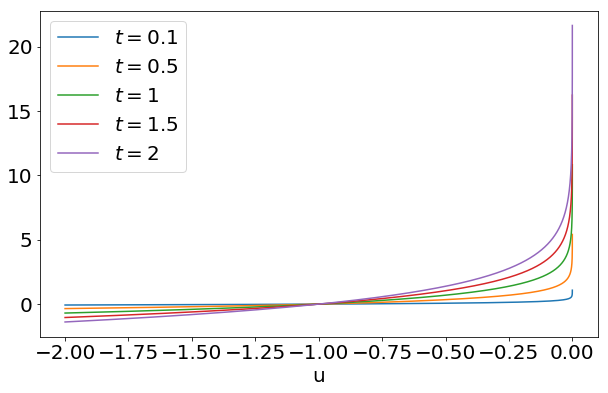

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 0, 100000, endpoint=False)
plt.figure(figsize=(10, 6))
for t in [0.1, 0.5, 1, 1.5, 2]:
    plt.plot(x, -t * np.log(-x), label=r"$t = " + str(t) + "$")
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("u", fontsize=20)

### "Ограниченная" задача

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m -t \log(-f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
- Задача по-прежнему **выпуклая**
- Функция 
$$
\phi(x) = -\sum\limits_{i=1}^m \log(-f_i(x))
$$ 
называется *логарифмическим барьером*. Её область определения - множество точек, для котороых ограничения типа неравенств выполняются строго.

**Упражнение.** Найдите градиент и гессиан $\phi(x)$

## Центральный путь

Для каждого $t > 0$ "ограниченная" задача имеет единственное решение $x^*(t)$.

**Определение.** Последовательность $x^*(t)$ для $t > 0$ образует *центральный путь*.

## Условия оптимальности для "ограниченной" задачи

- Разрешимость прямой задачи
$$
Ax^*(t) = b, \; f_i(x^*) < 0, \; i = 1,\ldots,m
$$
- Стационарность лагранжиана
\begin{equation*}
\begin{split}
& f'_0(x^*(t)) + \phi'(x^*(t)) + A^{\top}\hat{\mu} = \\
& = f'_0(x^*(t)) - t\sum_{i=1}^m \frac{f_i'(x^*(t))}{f_i(x^*(t))} + A^{\top}\hat{\mu} = 0
\end{split}
\end{equation*}

- Обозначим 
$$
\lambda^*_i(t) = -\frac{t}{f_i(x^*(t))} \; i=1,\ldots,m \text{ и } \mu^* = \hat{\mu}
$$
- Тогда условие оптимальности можно записать как
$$
f'_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i'(x^*(t)) + A^{\top}\mu^* = 0
$$
- Тогда $x^*(t)$ минимизирует лагранжиан 
$$
L = f_0(x) + \sum_{i=1}^m \lambda_if_i(x) + \mu^{\top}(Ax - b)
$$
для $\lambda = \lambda^*(t)$ и $\mu = \mu^*$.

### Зазор двойственности

- Двойственная функция $g(\lambda^*(t), \mu^*)$ конечна и представима в виде
\begin{equation*}
\begin{split}
g(\lambda^*(t), \mu^*) & = f_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i(x^*(t)) + (\mu^*)^{\top}(Ax^*(t) - b)\\
& = f_0(x^*(t)) - mt
\end{split}
\end{equation*}

- Зазор двойственности
$$
f_0(x^*(t)) - p^* \leq mt
$$

- При $t \to 0$ зазор двойственности равен 0 и центральный путь сходится к решению исходной задачи.

## ККТ интерпретация

Условия оптимальности для "ограниченной" задачи эквивалентны условиям оптимальности для исходной задачи если
$$
-\lambda_i f_i(x) = 0 \Rightarrow - \lambda_i f_i(x) = t \quad i = 1,\ldots, m
$$

## Физическая интерпретация
- Предположим, что ограничений типа равенства нет
- Рассмотрим неквантовую частицу в поле сил
- Каждому ограничению $f_i(x) \leq 0$ поставим в соответствие силу
$$
F_i(x) = -\nabla(-\log(-f_i(x))) = \frac{f'_i(x)}{f_i(x)}
$$
- Целевой функции также поставим в соответствие силу 
$$
F_0(x) = -\frac{f'_0(x)}{t}
$$
- Каждая точка из центрального пути $x^*(t)$ - это положение частицы, в котором выполняется баланс сил ограничений и целевой функции
- С уменьшением $t$ сила для целевой функции доминирует, и частица стремится занять положение, расположенное ближе к оптимальному
- Поскольку сила ограничений стремится к бесконечности при приближении частицы к границе, частица никогда не вылетит из допустимого множества

## Барьерный метод

- $x_0$ должна быть допустимой
- $t_0 > 0$ - начальное значение параметра
- $\alpha \in (0, 1)$ - множитель для уменьшения $t_0$

```python
def BarrierMethod(f, x0, t0, tol, alpha, **kwargs):
    x = x0
    t = t0
    while True:
        x = SolveBarrierProblem(f, t, x, **kwargs)
        if m * t < tol:
            break
        t *= alpha
    return x
```

### Точность решения "ограниченной" задачи

- Точное решение "ограниченной" задачи не требуется, так как приближённый центральный путь всё равно сойдётся к решению исходной задачи
- Двойственные переменные перестают быть двойственными при неточном решении, но это поправимо введением поправочных слагаемых
- Разница в стоимости точного и неточного центрального пути - несколько итераций метода Ньютона, поэтому существенного ускорения добиться нельзя

### Выбор параметров
- Множитель $\alpha$
    - При $\alpha \sim 1$, **мало** итераций нужно для решения "ограниченной" задачи, но **много** для нахождения точного решения исходной задачи
    - При $\alpha \sim 10^{-5}$ **много** итераций нужно для решения "ограниченной" задачи, но **мало** для нахождения точного решения исходной задачи
- Начальный параметр $t_0$
    - Аналогичная альтернатива как и для параметра $\alpha$
    - Параметр $t_0$ задаёт начальную точку для центрального пути

### Почти теорема сходимости

- Как было показано выше при $t \to 0$ барьерный метод сходится к решению исходной задачи
- Скорость сходимости напрямую связана с параметрами $\alpha$ и $t_0$, как показано ранее
- Основная сложность - быстрое решение вспомогательных задач методом Ньютона

## Задача поиска допустимого начального приближения

- Барьерный метод требует допустимого начального приближения
- Метод разбивается на две фазы
    - Первая фаза метода ищет допустимое начальное приближение
    - Вторая фаза использует найденное начальное приближение для запуска барьерного метода

### Первая фаза метода

Простой поиск допустимой точки

\begin{equation*}
\begin{split}
& \min s\\
\text{s.t. } & f_i(x) \leq s\\
& Ax = b
\end{split}
\end{equation*}
- эта задача всегда имеет строго допустимое начальное приближение
- если $s^* < 0$, то $x^*$ строго допустима и может быть использована в барьерном методе
- если $s^* > 0$, то задача не разрешима и допустимое множество пусто

### Сумма несогласованностей
\begin{equation*}
\begin{split}
& \min s_1 + \ldots + s_m\\
\text{s.t. } & f_i(x) \leq s_i\\
& Ax = b\\
& s \geq 0
\end{split}
\end{equation*}
- оптимальное значене равно нулю и достигается тогда и только тогда когда система ограничений совместна
- если задача неразрешима, то можно определить какие ограничения к этому приводят, то есть какие $s_i > 0$ 

### Вторая фаза метода

- После получения допустимой начальной точки $x_0$ выполняется обычный метод Ньютона для задачи с ограничениями равенствами

## Прямо-двойственный метод

Похож на барьерный метод, но
- нет разделения на внешние итерации и внутренние: на каждой итерации обновляются прямые и двойственные переменные
- направление определяется методом Ньютона, применённого к модифицированной системе ККТ
- последовательность точек в прямо-двойственном методе не обязательно допустимы 
- работает даже когда задача не строго допустима

## Резюме

- Метод Ньютона для выпуклой задачи с оганичениями типа равенств
- Случай недопустимой начальной точки
- Прямой барьерный метод
- Прямо-двойственный метод

# Семинар 21
# Метод штрафов и модифицированной функции Лагранжа

## На прошлом семинаре

- Методы внутренней точки
- Метод внутренних барьеров (логарифмических)
- Прямо-двойственный метод

## Метод внешних штрафов

**Идея:** если внутренние штрафы (барьеры) предотвращали выход точки из множества, то внешние штрафы существенно увеличивают целевую функцию при выходе точки из множества, но позволяют этому случиться.

## Задача с ограничениями-равенствами

\begin{equation*}
\begin{split}
& \min f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m
\end{split}
\end{equation*}

### Квадратичная штрафная функция
Исходную задачу можно преобразовать к задаче безусловной оптимизации
$$
\min_x Q(x, \mu),
$$
где 

$$
Q(x, \mu) = f(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x), \quad \mu > 0
$$
- Если ограничение не выполняется, то значение целевой функции увеличивается пропорционально парамеру $\mu$
- При увеличении параметра $\mu$, решение задачи всё точнее и точнее удовлетворяет ограничениям

### Общая схема

```python
def QudraticPenaltyEquality(Q, gradQ, x0, get_mu, get_tau, **kwargs):
    while True:
        # Stop when norm of gradient of Q is less than current tau
        x = MinimizeQ(Q, gradQ, x0, get_tau)
        if global_cnvergence(x, Q, **kwargs):
            break
        mu = get_mu()
        Q, gradQ = UpdateQ(mu)
        x0 = UpdateStartPoint(x, Q)
    return x
```

- Параметр $\mu$ нужно изменять в зависимости от сложности решения подзадачи: если известно, что задача решается долго, то $\mu$ нужно увеличивать плавно, например $\mu_{k+1} = 2\mu_k$. Eсли подзадача решается быстро, то можно более резко увеличивать $\mu$: $\mu_{k+1} = 15\mu_k$.
- При увеличении $\mu$ решение подзадачи становятся сложнее из-за плохой обусловленности гессиана. Об этом подробнее ниже.

### Сходимость

**Теорема 1.** Пусть для каждого $\mu$ безусловная задача имеет конечное глобальное решение. Тогда предельная точка последовательности решений безусловных задач при $\mu \to \infty$ сходится к глобальному решению исходной задачи.

- Проблема: глобальный оптимум для каждой подзадачи не всегда может быть достигнут!

**Теорема 2.** Пусть $\tau_k \to 0$ и $\mu_k \to \infty$ и $\| Q'(x^*_k, \mu_k) \| \leq \tau_k$. Тогда 
- если $x^*_k \to x^*$ и $x^*$ - недопустима, то $x^*$ стационарная точка функции $\| g(x) \|^2_2$;
- если $x^*$ - допустима и градиенты ограничений в этой точке линейно независимы, тогда $x^*$ - точка в которой выполнены KKT.

Для любой подпоследовательности $x^*_k \to x^*, \; k \in \mathcal{C}$ точек выполнено
$$
\lim_{k \in \mathcal{C}} \mu_k g_i(x_k) = \lambda_i^*
$$
для всех $i = 1,\ldots,m$, где $\lambda_i^*$ множители Лагранжа, удовлетсворяющие ККТ.

### Вырожденность гессиана

**Пример.**
\begin{equation*}
\begin{split}
& \min -5x_1^2 + x_2^2\\
\text{s.t. }& x_1 = 1
\end{split}
\end{equation*}
Штрафная функция примет вид
$$
Q(x, \mu) = -5x_1^2 + x_2^2 + \frac{\mu}{2}(x_1 - 1)^2
$$
**Наблюдение** При $\mu < 10$ функция $Q(x, \mu)$ неограничена снизу по $x$ и подзадача не имеет конечного решения

### Общий вид гессиана
$$
Q''(x, \mu) = f''(x) + \mu\sum_{i=1}^m g_i(x) g''_i(x) + \mu(g'(x))^{\top} g'(x),
$$
где $g'(x)$ - якобиан вектор-функции ограничений-равенств.

Около точки минимума в силу теоремы 2 справедливо следующее приближение
$$
Q''(x, \mu) \approx L''(x, \lambda^*) + \mu(g'(x))^{\top} g'(x)
$$

- гессиан лагранжиана не зависит от $\mu$
- произведение $(g'(x))^{\top} g'(x)$ ранга $m \ll n$

**Итог:** некоторые собственные значения гессиана $Q''(x, \mu)$ имеют порядок $\mu$, что приводит к вырожденности при увеличении $\mu$

**Следствие:** поиск направления в методе Ньютона очень неточный

### Как искать направление в методе Ньютона?

$$
Q''(x_k, \mu)p = -Q'(x_k, \mu)
$$

Введём новую переменную $\xi = \mu g'(x) p$ и запишем эту систему в виде
$$
\begin{bmatrix}
f''(x) + \mu \sum\limits_{i=1}^m g_i(x)g_i''(x) & g'(x) \\
(g'(x))^{\top} & -\frac{1}{\mu} I
\end{bmatrix}
\begin{bmatrix}
p\\
\xi
\end{bmatrix}
= 
\begin{bmatrix}
-Q'(x, \mu)\\
0
\end{bmatrix}
$$

- Обусловленность этой системы уже не растёт с ростом $\mu$
- Размерность увеличилась на $m$
- Проблема неадекватности квдратичной аппроксимации остаётся

## Задача с ограничениями типа равенств и неравенств

\begin{equation*}
\begin{split}
& \min_x f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m \\
& h_j(x) \leq 0, \; j = 1,\ldots,p
\end{split}
\end{equation*}

### Штрафная функция

$$
\min_x f(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x) + \frac{\mu}{2}\sum\limits_{j=1}^p (\max(0, h_j(x)))^2,
$$
где $\mu > 0$
- Отличие от задачи без ограничений-неравенств: вторая производная штрафной функции разврывна и, как следствие, штрафная функция уже не дважды непрерывно дифференцируемая

## Pro & Contra

Pro

- автоматический способ превращения произвольной задачи *условной* оптимизации в задачу *безусловной* оптимизации
- начальную точку искать не надо
- часто ограничения не строгие и незначительное нарушение ограничений допустимо
- простота реализации общей схемы

Contra

- решение задачи безусловной оптимизации не всегда является решением исходной задачи
- если целевая функция определена только на допустимом множестве, то метод внешних штрафов не применим
- квадратичная аппроксимация $Q(x, \mu)$ может быть неадекватной

## Метод модифицированной функции Лагранжа
**Мотивация:** для метода штрафных функций решения подзадач могут нарушать ограничения, и известно только, что
$$
g_i(x^*_k) \approx \frac{\lambda^*}{\mu_k} \to 0, \quad \mu_k \to \infty
$$
Можно ли изменить $Q(x, \mu)$ так, чтобы избежать этого нарушения ограничений?

**Идея:** добавлять штраф не к целевой функции, а к функции Лагранжа. Аналог прямо-двойственного метода, так как за одну итерацию происходит обновление как прямых, так и двойственных переменных

## Задача с ограничениями-равенствами

\begin{equation*}
\begin{split}
& \min f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m
\end{split}
\end{equation*}

### Модифицированная функция Лагранжа
$$
M(x, \lambda, \mu) = f(x) + \sum\limits_{i=1}^m\lambda_i g_i(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x)
$$

Необходимое условие минимума $M(x_k, \lambda^k, \mu_k)$
$$
f'(x_k) + \sum\limits_{i=1}^m (\lambda^k_i + \mu_k g_i(x_k) ) g'_i(x_k) \approx 0
$$
Отсюда получаем выражение для $\lambda^{k+1}$
$$
\lambda^{k+1}_i = \lambda^k_i + \mu_k g_i(x_k)
$$

### Нарушение ограничений

$$
g_i(x_k) \approx \frac{\lambda^*_i - \lambda^k_i}{\mu_k} \to 0
$$
- В методе штрафных функций сходимость к 0 была порядка $1/\mu_k$
- В методе модифицированной функции Лагранжа сходимость к 0 быстрее, поскольку не только знаменатель возрастает, но и числитель стремится к 0

## Задача с ограничениями типа равенства и неравенства
\begin{equation*}
\begin{split}
& \min_x f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m \\
& h_j(x) \leq 0, \; j = 1,\ldots,p
\end{split}
\end{equation*}

### Модифицированная функция Лагранжа

$$
M(x, \mu, \lambda, \nu) = f(x) + \sum\limits_{i=1}^m \left[\lambda_ig_i(x) + \frac{\mu}{2}g^2_i(x)\right] + \frac{1}{2\mu}\sum\limits_{j=1}^p\left[ (\nu_j + \mu h_j(x))_+^2 - \nu^2_j \right],
$$
где $\lambda$ - двойственные переменные для ограничений-равенств, $\nu$ - двойственная переменная для ограничений неравенств.
- Почему $(x, \mu, \lambda, \nu)$ так выглядит, смотрите в лекциях

### Обновление двойственных переменных для неравенств
$$
\nu^{k+1}_j = (\nu^k_j + \mu_k h_j(x_k))_+
$$

### Общая схема 

1. Формируется функция $M$
2. По необходимым условиям находится выражение для $x_k(\lambda, \nu, \mu)$ и проверяется по достаточным условиям на минимум
3. Взятием предела по $\mu \to \infty$ при фиксированных двойственных переменных определяются прямые переменные, являющиеся решением исхожной задачи
4. Выражения для $x^k$ подставляются в выражения для $\lambda$ и $\nu$
5. Взятием предела по $\mu \to \infty$ определяются двойственные переменные для найденных оптимальных прямых переменных

### Сходимость

- Локальная сходимость при выборе начального приближения достаточно близко к минимуму по прямым и двойственным переменным
- Бесконечно увеличивать параметр $\mu$ не нужно: для некотрого достаточно большого $\mu$ решения вспомогательных задач гарантировано будут сходиться к решению исходной задачи
- Решение вспомогательных задач проще, чем в методе штрафов, так как параметр $\mu$ ограничен сверху

## Практические замечания

- Метод модифицированной функции Лагранжа предпочтительнее, поскольку решение подзадачи не сложнее, чем в методе штрафов, но сходимость более быстрая
- Метод штрафов становится предпочтительным как регуляризация в подходе *последовательного квадратичного программирования* ([SQP](https://en.wikipedia.org/wiki/Sequential_quadratic_programming))
- Пакеты [LACELOT](http://www.numerical.rl.ac.uk/lancelot/blurb.html) и [MINOS](https://en.wikipedia.org/wiki/MINOS_(optimization_software)) по-разному реализуют метод модифицированной функции Лагранжа
- В [статье](https://www.dropbox.com/s/rdqcn0fppumreto/MinosvsLancelot.pdf?dl=0) приведено сравнение этих пакетов, однако они оба созданы в начале 90х и написаны на Fortran'e